<a href="https://colab.research.google.com/github/srdiegorodrigues/projeto/blob/main/pesquisa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O presente trabalho visa replicar uma das etapas elaboradas na dissertação de mestrado de Tadeu Teixeira Guimarães Júnior.
O trabalho pode ser acessado em
https://recipp.ipp.pt/bitstream/10400.22/22651/1/DM_TadeuGuimaraesJunior_2022_MEI.pdf

In [70]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import io
from google.colab import files

In [71]:
#Carregar arquivos a serem analisados
url = "/content/drive/MyDrive/MESTRADO/DADOS/OCORRENCIAS/"

df_2018 = pd.read_csv(io.StringIO(open(f'{url}datatran2018.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
df_2019 = pd.read_csv(io.StringIO(open(f'{url}datatran2019.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
df_2020 = pd.read_csv(io.StringIO(open(f'{url}datatran2020.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
df_2021 = pd.read_csv(io.StringIO(open(f'{url}datatran2021.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
df_2022 = pd.read_csv(io.StringIO(open(f'{url}datatran2022.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
df_2023 = pd.read_csv(io.StringIO(open(f'{url}datatran2023.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)

<ipython-input-71-c9c08b7e939a>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_2018 = pd.read_csv(io.StringIO(open(f'{url}datatran2018.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
<ipython-input-71-c9c08b7e939a>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_2019 = pd.read_csv(io.StringIO(open(f'{url}datatran2019.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
<ipython-input-71-c9c08b7e939a>:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2019 = pd.read_csv(io.StringIO(open(f'{url}datatran2019.csv', 'r', encoding='ISO-8859-1').read()), sep=';', error_bad_lines =False)
<ipython-input-71-c9c08b7e939a>:6: FutureWarning: The error_bad_lines argument has been deprecated and wil

In [72]:
#concatenar os arquivos de análise em apenas um
df = pd.concat([df_2018, df_2019, df_2020, df_2021, df_2022, df_2023], ignore_index=True)

#armazenar o cabecalho dos dados em uma variavel
colunas = df.columns

df.shape

(164946, 30)

In [73]:
df_2018.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,100027,01/01/2018,segunda-feira,06:00:00,TO,153.0,"393,1",RIO DOS BOIS,Falta de Atenção à Condução,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Não Informado,0,2,0,0,1,1,0,1,2,"-9,35641407","-48,54610294",SPRF-TO,DEL02-TO,UOP02-DEL02-TO
1,100044,01/01/2018,segunda-feira,08:30:00,SE,101.0,"123,4",ITAPORANGA DAJUDA,Não guardar distância de segurança,Colisão traseira,Sem Vítimas,Pleno dia,Decrescente,Céu Claro,Dupla,Reta,0,2,0,0,0,2,0,0,2,"-11,04476007","-37,36498",SPRF-SE,DEL02-SE,UOP01-DEL02-SE
2,100046,01/01/2018,segunda-feira,08:50:00,TO,153.0,347,GUARAI,Falta de Atenção à Condução,Colisão lateral,Sem Vítimas,Pleno dia,Crescente,Céu Claro,Simples,Não Informado,0,2,0,0,0,2,0,0,2,"-8,952295","-48,500107",SPRF-TO,DEL02-TO,UOP02-DEL02-TO
3,100052,01/01/2018,segunda-feira,05:30:00,PA,155.0,221,ELDORADO DO CARAJAS,Ingestão de Álcool,Colisão lateral,Com Vítimas Fatais,Amanhecer,Crescente,Céu Claro,Simples,Reta,0,2,1,0,0,1,0,0,2,"-6,345512","-49,389626",SPRF-PA,DEL03-PA,UOP01-DEL03-PA
4,100053,01/01/2018,segunda-feira,10:25:00,BA,116.0,"289,6",TUCANO,Ultrapassagem Indevida,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Simples,Reta,0,1,0,0,1,0,0,1,1,"-11,08661652","-38,83420181",SPRF-BA,DEL02-BA,DEL10/2-UOP02/BA


In [74]:
df_2023.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,496519,01/01/2023,domingo,02:00:00,ES,101.0,114,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Reta,0,1,0,1,0,0,0,1,1,"-19,09484877","-40,05095848",SPRF-ES,DEL04-ES,UOP01-DEL04-ES
1,496543,01/01/2023,domingo,03:40:00,SP,116.0,"113,1",TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,1,5,1,0,0,0,4,0,1,"-23,0445658","-45,58259814",SPRF-SP,DEL02-SP,UOP02-DEL02-SP
2,496590,01/01/2023,domingo,01:40:00,MT,163.0,1112,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Plena Noite,Crescente,Ignorado,Simples,Não Informado,0,1,0,0,1,0,0,1,1,"-9,70020602","-54,87588757",SPRF-MT,DEL06-MT,UOP03-DEL06-MT
3,496610,01/01/2023,domingo,10:40:00,PR,376.0,"314,8",ORTIGUEIRA,Velocidade Incompatível,Tombamento,Sem Vítimas,Pleno dia,Crescente,Sol,Dupla,Curva,0,1,0,0,0,1,0,0,1,"-23,985512","-51,083555",SPRF-PR,DEL07-PR,UOP02-DEL07-PR
4,496659,01/01/2023,domingo,14:55:00,MG,116.0,"569,4",MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Chuva,Simples,Não Informado,0,3,0,0,2,1,0,2,2,"-20,10007457","-42,17884091",SPRF-MG,DEL06-MG,UOP03-DEL06-MG


In [75]:
#Verificação da presença de valores nulos nos campos

df.isnull().sum()

id                          0
data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                        266
km                        266
municipio                   0
causa_acidente              0
tipo_acidente              20
classificacao_acidente      0
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
ignorados                   0
feridos                     0
veiculos                    0
latitude                    0
longitude                   0
regional                    4
delegacia                 246
uop                       377
dtype: int64

In [76]:
#removendo os registros com presença de valores nulos em um dos atributos. pag 46
df = df.dropna()
df.shape

(164145, 30)

In [77]:
#Verificando as opções de respotas para o atributo condição_metereologica

df['condicao_metereologica'].value_counts()

Céu Claro           94252
Nublado             28473
Chuva               20005
Sol                 11912
Garoa/Chuvisco       5882
Ignorado             1906
Nevoeiro/Neblina     1422
Vento                 286
Granizo                 5
Neve                    2
Name: condicao_metereologica, dtype: int64

In [78]:
#Substituir valor Ignorado por Céu Claro e Neve por Chuva. pag 46

df['condicao_metereologica'] = df['condicao_metereologica'].str.replace('Ignorado', 'Céu Claro')
df['condicao_metereologica'] = df['condicao_metereologica'].str.replace('Neve', 'Chuva')

<ipython-input-78-5e93a9973a28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['condicao_metereologica'] = df['condicao_metereologica'].str.replace('Ignorado', 'Céu Claro')


In [79]:
df['condicao_metereologica'].value_counts()

Céu Claro           96158
Nublado             28473
Chuva               20007
Sol                 11912
Garoa/Chuvisco       5882
Nevoeiro/Neblina     1422
Vento                 286
Granizo                 5
Name: condicao_metereologica, dtype: int64

In [80]:
#Remover as features que surgem como consequencia de um AT.

remover = ['id','veiculos', 'municipio','classificacao_acidente', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados', 'feridos']

df_before_AT = df[['km','data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'condicao_metereologica', 'latitude', 'regional', 'delegacia', 'uop']]

df_before_AT.head()

,km,data_inversa,dia_semana,horario,uf,br,condicao_metereologica,latitude,regional,delegacia,uop
0,"393,1",01/01/2018,segunda-feira,06:00:00,TO,153.0,Céu Claro,"-9,35641407",SPRF-TO,DEL02-TO,UOP02-DEL02-TO
1,"123,4",01/01/2018,segunda-feira,08:30:00,SE,101.0,Céu Claro,"-11,04476007",SPRF-SE,DEL02-SE,UOP01-DEL02-SE
2,347,01/01/2018,segunda-feira,08:50:00,TO,153.0,Céu Claro,"-8,952295",SPRF-TO,DEL02-TO,UOP02-DEL02-TO
3,221,01/01/2018,segunda-feira,05:30:00,PA,155.0,Céu Claro,"-6,345512",SPRF-PA,DEL03-PA,UOP01-DEL03-PA
4,"289,6",01/01/2018,segunda-feira,10:25:00,BA,116.0,Sol,"-11,08661652",SPRF-BA,DEL02-BA,DEL10/2-UOP02/BA


In [81]:
#Concatenar colunas data_inversa e horario e criando a feature data_hora

df_before_AT['data_hora'] = df.apply(lambda x: '%s.%s' % (x['data_inversa'],x['horario']), axis=1)

<ipython-input-81-ca607079cf09>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before_AT['data_hora'] = df.apply(lambda x: '%s.%s' % (x['data_inversa'],x['horario']), axis=1)


In [82]:
df_before_AT.head()

,km,data_inversa,dia_semana,horario,uf,br,condicao_metereologica,latitude,regional,delegacia,uop,data_hora
0,"393,1",01/01/2018,segunda-feira,06:00:00,TO,153.0,Céu Claro,"-9,35641407",SPRF-TO,DEL02-TO,UOP02-DEL02-TO,01/01/2018.06:00:00
1,"123,4",01/01/2018,segunda-feira,08:30:00,SE,101.0,Céu Claro,"-11,04476007",SPRF-SE,DEL02-SE,UOP01-DEL02-SE,01/01/2018.08:30:00
2,347,01/01/2018,segunda-feira,08:50:00,TO,153.0,Céu Claro,"-8,952295",SPRF-TO,DEL02-TO,UOP02-DEL02-TO,01/01/2018.08:50:00
3,221,01/01/2018,segunda-feira,05:30:00,PA,155.0,Céu Claro,"-6,345512",SPRF-PA,DEL03-PA,UOP01-DEL03-PA,01/01/2018.05:30:00
4,"289,6",01/01/2018,segunda-feira,10:25:00,BA,116.0,Sol,"-11,08661652",SPRF-BA,DEL02-BA,DEL10/2-UOP02/BA,01/01/2018.10:25:00


In [83]:
#Criaçaõ da feature chuva com base em condicao_metereologica


for indice, item in df_before_AT.iterrows():
    if item['condicao_metereologica'] in ['Chuva', 'Garoa/Chuvisco', 'Granizo']:
        df_before_AT.at[indice, 'chuva'] = 1
    else:
        df_before_AT.at[indice, 'chuva'] = 0

df_before_AT['chuva'].value_counts()

<ipython-input-83-d45ef277995c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before_AT.at[indice, 'chuva'] = 0


0.0    138251
1.0     25894
Name: chuva, dtype: int64

In [84]:
#apagar a coluna condicao_metereologica

df_before_AT = df_before_AT.drop('condicao_metereologica', axis=1)



In [85]:
df_before_AT.head()

,km,data_inversa,dia_semana,horario,uf,br,latitude,regional,delegacia,uop,data_hora,chuva
0,"393,1",01/01/2018,segunda-feira,06:00:00,TO,153.0,"-9,35641407",SPRF-TO,DEL02-TO,UOP02-DEL02-TO,01/01/2018.06:00:00,0.0
1,"123,4",01/01/2018,segunda-feira,08:30:00,SE,101.0,"-11,04476007",SPRF-SE,DEL02-SE,UOP01-DEL02-SE,01/01/2018.08:30:00,0.0
2,347,01/01/2018,segunda-feira,08:50:00,TO,153.0,"-8,952295",SPRF-TO,DEL02-TO,UOP02-DEL02-TO,01/01/2018.08:50:00,0.0
3,221,01/01/2018,segunda-feira,05:30:00,PA,155.0,"-6,345512",SPRF-PA,DEL03-PA,UOP01-DEL03-PA,01/01/2018.05:30:00,0.0
4,"289,6",01/01/2018,segunda-feira,10:25:00,BA,116.0,"-11,08661652",SPRF-BA,DEL02-BA,DEL10/2-UOP02/BA,01/01/2018.10:25:00,0.0


#Análise exploratória de dados

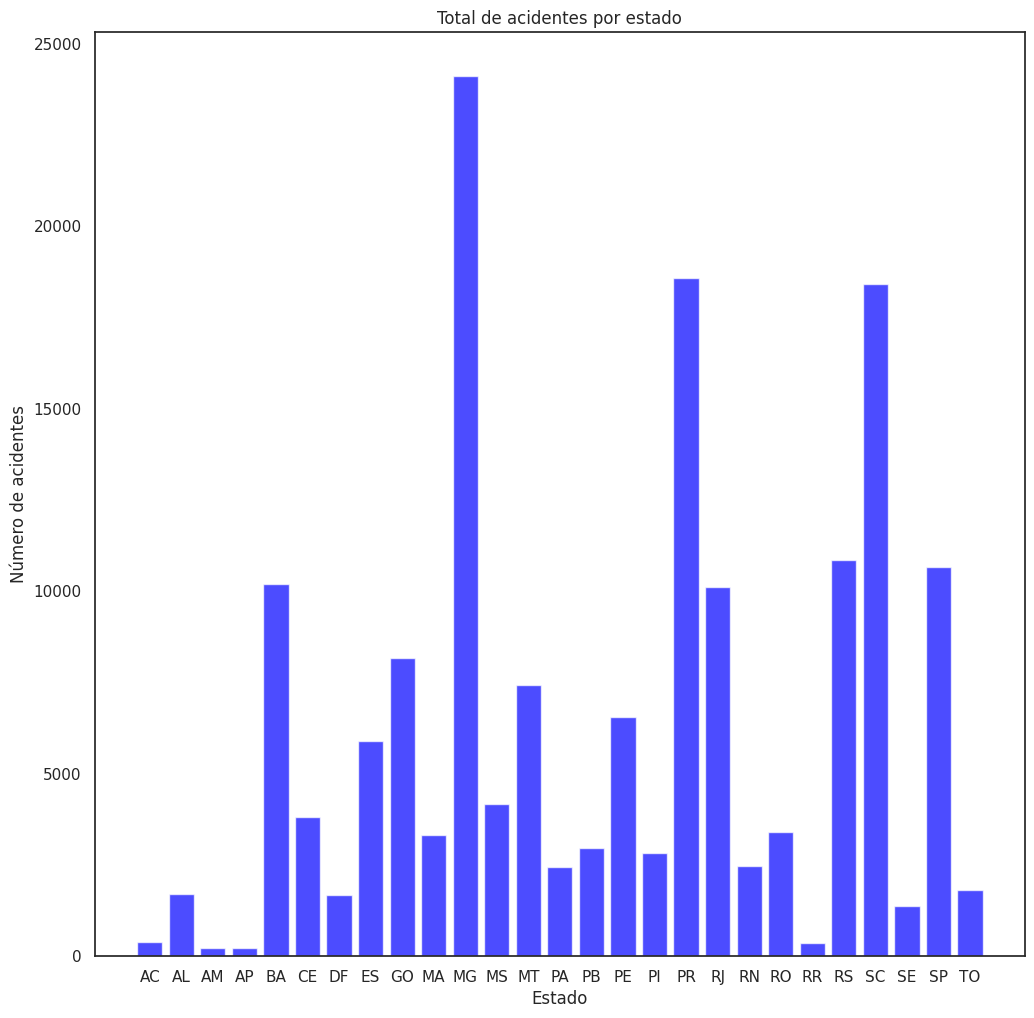

In [86]:
#Acidentes por estado
import matplotlib.pyplot as plt

# Agrupar os dados por estado e contar o número de ocorrências de acidentes para cada estado
resultados = df.groupby('uf').size().reset_index(name='numero_acidentes')
fig, ax = plt.subplots(figsize=(12, 12))
ax.bar(resultados['uf'], resultados['numero_acidentes'], color='blue', alpha=0.7)
ax.set_xlabel('Estado')
ax.set_ylabel('Número de acidentes')
ax.set_title('Total de acidentes por estado')
plt.show()


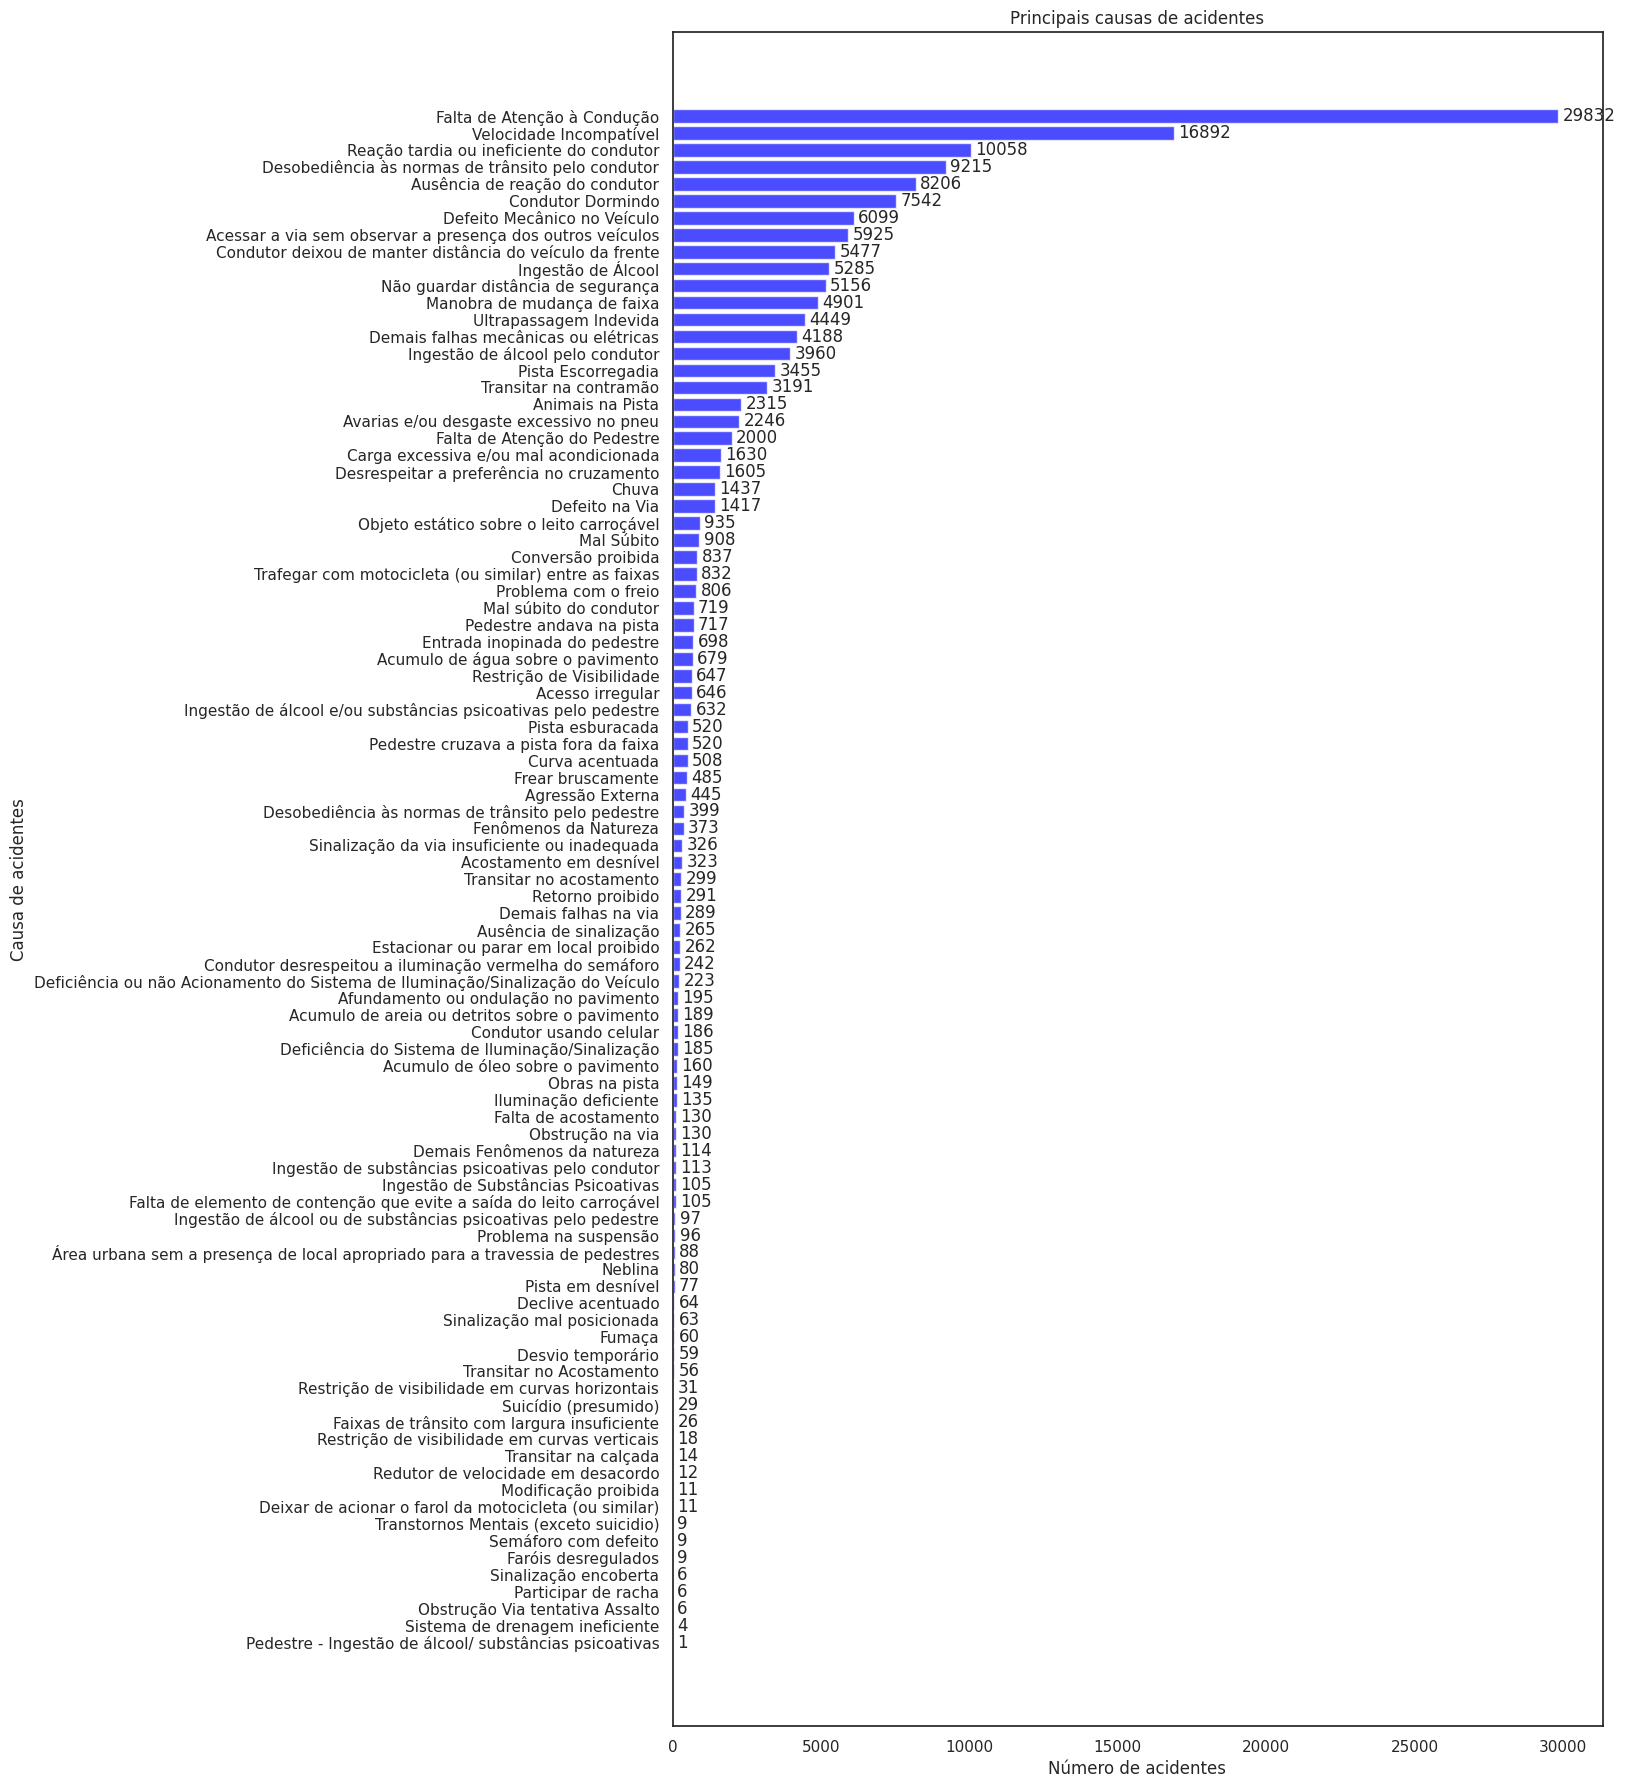

In [87]:
#Principais causas de acidentes

resultados = df.groupby('causa_acidente').size().reset_index(name='numero_acidentes')
resultados = resultados.sort_values(by='numero_acidentes', ascending=True)  # Mudança aqui
fig, ax = plt.subplots(figsize=(12, 22))
bars = ax.barh(resultados['causa_acidente'], resultados['numero_acidentes'], color='blue', alpha=0.7)  # Mudança aqui
ax.set_xlabel('Número de acidentes')  # Mudança aqui
ax.set_ylabel('Causa de acidentes')  # Mudança aqui
ax.set_title('Principais causas de acidentes')

# Adicionar o número de acidentes ao lado de cada barra
for bar in bars:
    width = bar.get_width()  # Mudança aqui
    ax.annotate('{}'.format(width),  # Mudança aqui
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(3, 0),  # 3 points horizontal offset
                textcoords="offset points",
                ha='left', va='center')

plt.show()

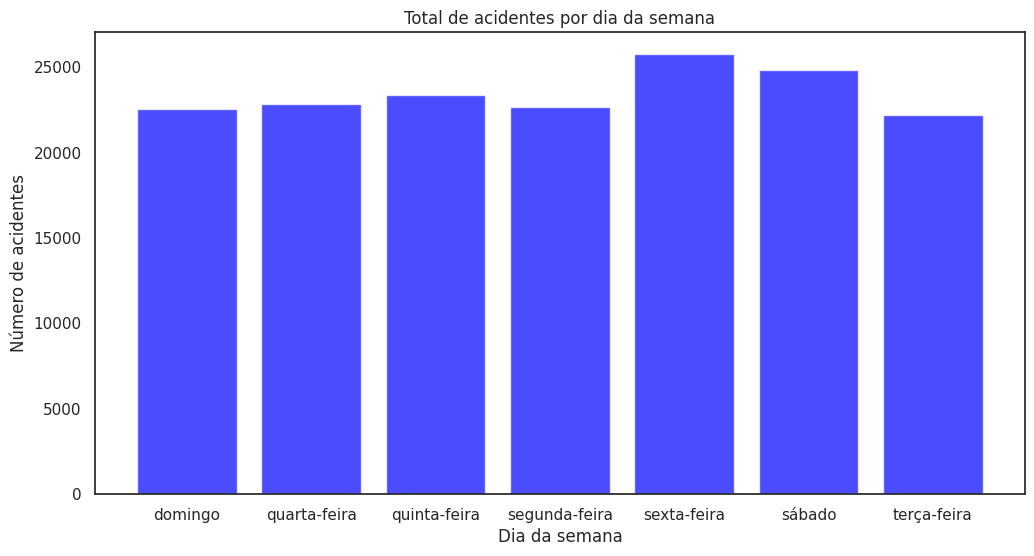

In [88]:
#Acidentes por Semana
# Agrupar os dados por estado e contar o número de ocorrências de acidentes para cada estado

resultados = df.groupby('dia_semana').size().reset_index(name='numero_acidentes')
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(resultados['dia_semana'], resultados['numero_acidentes'], color='blue', alpha=0.7)
ax.set_xlabel('Dia da semana')
ax.set_ylabel('Número de acidentes')
ax.set_title('Total de acidentes por dia da semana')


plt.show()

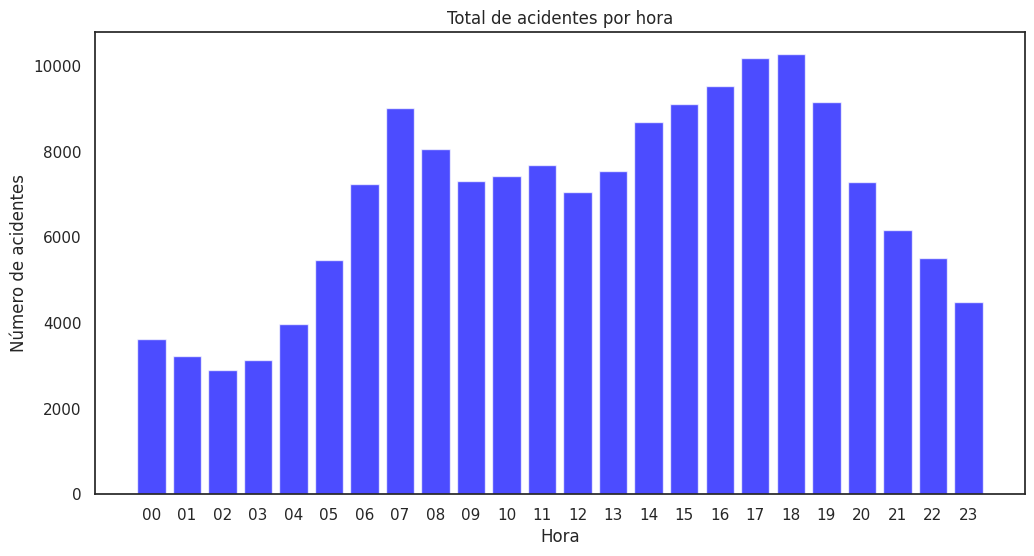

In [89]:
#Acidentes por Semana
# Extrair apenas a hora do horário
df['hora'] = df['horario'].str.split(':').str[0]
resultados = df.groupby('hora').size().reset_index(name='numero_acidentes')
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(resultados['hora'], resultados['numero_acidentes'], color='blue', alpha=0.7)
ax.set_xlabel('Hora')
ax.set_ylabel('Número de acidentes')
ax.set_title('Total de acidentes por hora')
plt.show()

<ipython-input-90-cd915bdd98e2>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacao = df_before_AT.corr()


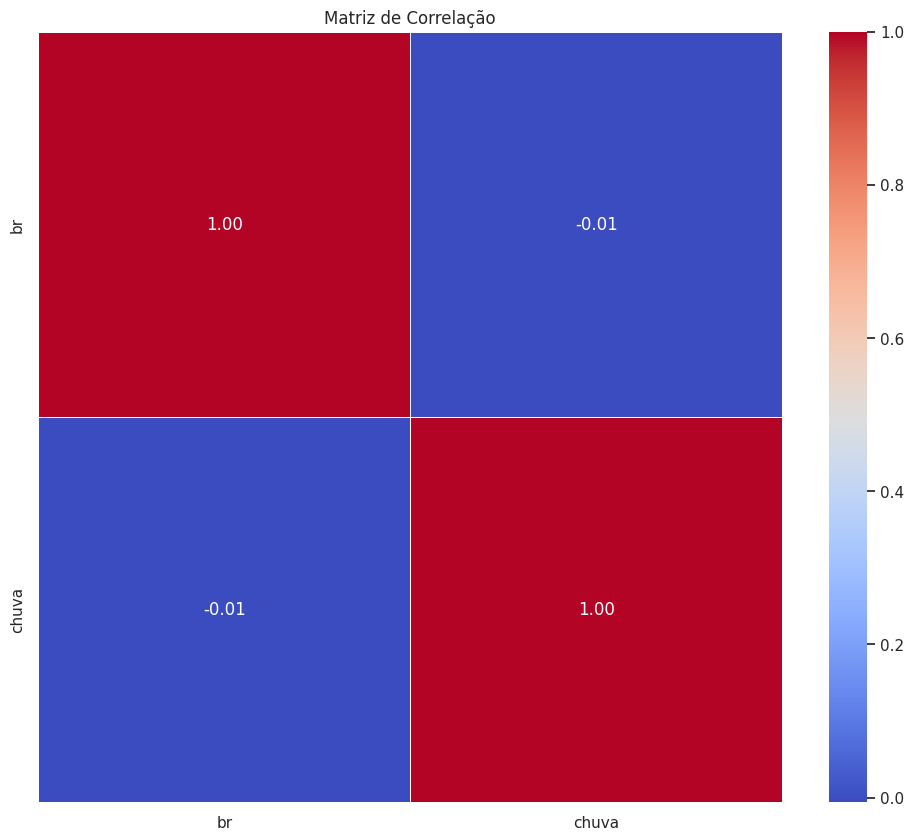

In [90]:
#Matriz de correlação
#é necessário verificar a codificação one hot enconding
import seaborn as sns

# Cria a matriz de correlação
matriz_correlacao = df_before_AT.corr()

sns.set(style="white")

# Cria o mapa de calor (heatmap) utilizando seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacao, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlação")
plt.show()